# EDUCATION PROJECT

# Introduction

#### The Problem: Whether school performance, measured by the average ACT score, is predicted by socioeconomic factors.

Academic achievement is a key indicator of quality education and student success. But achievement between schools varies widely, and there are basic questions about what determines differences in such outcomes. As policymakers and educators are inclined to focus on school expenditures as a lever for reform, research shows that the connection between expenditures and outcomes is one of complexity and mediation by socioeconomic factors.

Socioeconomic status is one of the most effective predictors of school and individual academic success. Children from more affluent families, better-educated parents, and stable employment are more likely to perform well academically. But this raises a basic policy question: Can mathematical school spending, and in particular, investment in high-quality personnel through competitive compensation, close the achievement gap associated with socioeconomic disadvantage? 

I am considering the major questions:

1. Do socioeconomic predictors predict school performance?
2. Does spending by schools on employees' salaries predict student performance over socioeconomic factors?
3. Does non-federal funded and federally funded salary matter?

## Data Description

The three major datasources with source links:
1. socioeconomic factors data from EdGap.org- https://www.edgap.org/#4/37.71/-95.99
2. school characteristics from the Common Core of Data (CCD)- https://nces.ed.gov/ccd/
3. school expenditure data from the Civil Rights Data Collection (CRDC)- https://ocrdata.ed.gov/data

#### The very first thing when working on a project is import the libraries that were required to explore and work on the dataset, Here I imported the necessary libraries:
Here the 'pandas' and 'numpys' will be used to handle the data and perform the numerical operations. The matplotlib and seaborn are used to plot the data for better visualization. Whitegrid style is set for better understanding and clean visulaizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

The libraries were sucessfully imported, which ensures that i have the required tools to perform data cleaning, analyzing, manipulation and visualization.

In any data analysis its crucial to load and inspect the raw datasets. Before proceeding with analysis, we examine the structure, dimensions, and first few rows of each dataset to understand what variables are available and identify potential issues.

In [2]:
edgap = pd.read_excel(
    "C:/Users/SRAVYASRI/Downloads/DATA 5100_Foundations of data science/Education/data/EdGap_data.xlsx",
    dtype={'NCESSCH School ID': object}
)
edgap.head()

C:\Users\SRAVYASRI\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [3]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [4]:
School_information = pd.read_csv("https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1", encoding='unicode_escape',low_memory= False)
pd.set_option('display.max_columns', None)
School_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID    LEAID  \
0  Alabama Youth Services              01    NaN   AL-210  0100002   
1  Alabama Youth Services              01    NaN   AL-210  0100002   
2  Alabama Youth Services              01    NaN   AL-210  0100002   
3  Alabama Youth Services              01    NaN   AL-210  0100002   
4  Alabama Youth Services              01    NaN   AL-210  0100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P O Box 9486      NaN      NaN   
1  AL-210-0050  1.000020e+10  101667.0         P O Box 66      NaN      NaN   
2  AL-210-0060  1.000020e+10  101670.0         P O Box 66      NaN      NaN   
3  AL-210-0030  1.000020e+10  101705.0         P O Box 66      NaN      NaN   
4  AL-210-0040  1.000020e+10  101706.0  8950 Roebuck Blvd      NaN      NaN   

         MCITY MSTATE   MZIP MZIP4                     LSTREET1 LSTREET2  \
0   Birmingham     AL  35220   NaN  1000 Industrial School Road      NaN   
1     Mt Meigs     AL  36057   NaN           1601 County Rd. 57      NaN   
2     Mt Meigs     AL  36057   NaN       2109 Bashi Rd Bldg 509      NaN   
3  Mount Meigs     AL  36057   NaN  1000 Industrial School Road      NaN   
4   Birmingham     AL  35206   NaN            8950 Roebuck Blvd      NaN   

  LSTREET3        LCITY LSTATE   LZIP LZIP4          PHONE  \
0      NaN   Birmingham     AL  35220   NaN  (205)680-8574   
1      NaN   Prattville     AL  36067   NaN  (334)215-3850   
2      NaN  Thomasville     AL  36784   NaN  (334)215-3850   
3      NaN  Mount Meigs     AL  36057   NaN  (334)215-6039   
4      NaN   Birmingham     AL  35206   NaN  (205)838-4981   

                      WEBSITE SY_STATUS SY_STATUS_TEXT UPDATED_STATUS  \
0  http://www.dys.alabama.gov         1           Open              1   
1  http://www.dys.alabama.gov         1           Open              1   
2  http://www.dys.alabama.gov         1           Open              1   
3  http://www.dys.alabama.gov         1           Open              1   
4  http://www.dys.alabama.gov         1           Open              1   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE  \
0                Open     03/03/2010  Alternative School        4   
1                Open     03/03/2010  Alternative School        4   
2                Open     03/03/2010  Alternative School        4   
3                Open     03/03/2010  Alternative School        4   
4                Open     03/03/2010  Alternative School        4   

  RECON_STATUS OUT_OF_STATE_FLAG CHARTER_TEXT CHARTAUTH1 CHARTAUTHN1  \
0           No                No           No        NaN         NaN   
1           No                No           No        NaN         NaN   
2           No                No           No        NaN         NaN   
3           No                No           No        NaN         NaN   
4           No                No           No        NaN         NaN   

  CHARTAUTH2 CHARTAUTHN2 NOGRADES G_PK_OFFERED G_KG_OFFERED G_1_OFFERED  \
0        NaN         NaN       No           No           No          No   
1        NaN         NaN       No           No           No          No   
2        NaN         NaN       No           No           No          No   
3        NaN         NaN       No           No           No          No   
4        NaN         NaN       No           No           No          No   

  G_2_OFFERED G_3_OFFERED G_4_OFFERED G_5_OFFERED G_6_OFFERED G_7_OFFERED  \
0          No          No   

In [5]:
School_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

In [6]:
Scl_expenditures = pd.read_csv(
    "C:/Users/SRAVYASRI/Downloads/DATA 5100_Foundations of data science/Education/data/School Expenditures.csv",encoding='unicode_escape',low_memory= False
)
Scl_expenditures.head()

LEA_STATE LEA_STATE_NAME    LEAID                LEA_NAME  SCHID  \
0        AL        ALABAMA  0100002  Alabama Youth Services   1705   
1        AL        ALABAMA  0100002  Alabama Youth Services   1706   
2        AL        ALABAMA  0100002  Alabama Youth Services   1876   
3        AL        ALABAMA  0100002  Alabama Youth Services  99995   
4        AL        ALABAMA  0100005        Albertville City    870   

                        SCH_NAME      COMBOKEY   JJ  SCH_SAL_TOTPERS_WOFED  \
0  Wallace Sch - Mt Meigs Campus  010000201705  Yes              1908676.0   
1      McNeel Sch - Vacca Campus  010000201706  Yes              1563570.0   
2         Alabama Youth Services  010000201876   No              3998276.0   
3                 AUTAUGA CAMPUS  010000299995  Yes               305220.0   
4      Albertville Middle School  010000500870   No              2394774.5   

   SCH_FTE_TEACH_WOFED  SCH_SAL_TEACH_WOFED  SCH_NPE_WOFED  SCH_FTE_AID_WOFED  \
0                25.00           1827143.00      102500.00                0.0   
1                16.00           1305463.00       30502.00                0.0   
2                60.00           3400850.00      341426.00                0.0   
3                 3.00            305220.00       18700.00                0.0   
4                38.29           1782926.22      566767.07                2.0   

   SCH_SAL_AID_WOFED  SCH_FTE_SUP_WOFED  SCH_SAL_SUP_WOFED  SCH_FTE_ADM_WOFED  \
0               -9.0               0.00              -9.00                1.0   
1               -9.0               0.00              -9.00                1.0   
2               -9.0               0.00              -9.00                1.0   
3               -9.0               0.00              -9.00                1.0   
4            44432.0               7.29          309952.28                3.0   

   SCH_SAL_ADM_WOFED  SCH_SAL_TEACH_WFED  SCH_FTE_AID_WFED  SCH_SAL_AID_WFED  \
0            81533.0          1827143.00               0.0               0.0   
1            82000.0          1223463.00               0.0               0.0   
2            81533.0          3400850.00               0.0               0.0   
3            81553.0           305220.00               0.0               0.0   
4           257464.0          1944222.84               3.0           66178.0   

   SCH_FTE_SUP_WFED  SCH_SAL_SUP_WFED  SCH_FTE_ADM_WFED  SCH_SAL_ADM_WFED  \
0              0.00              0.00               1.0           81533.0   
1              0.00              0.00               0.0           82000.0   
2              0.00              0.00               1.0           81533.0   
3              0.00              0.00               1.0           82000.0   
4             13.89         514793.08               3.0          257464.0   

   SCH_SAL_TOTPERS_WFED  SCH_NPE_WFED  
0            1908676.00     102500.00  
1            1305463.00          0.00  
2            5122976.00          0.00  
3             386551.00      18700.00  
4            2782657.92    1059055.88

In [7]:
Scl_expenditures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97632 entries, 0 to 97631
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LEA_STATE              97632 non-null  object 
 1   LEA_STATE_NAME         97632 non-null  object 
 2   LEAID                  97632 non-null  object 
 3   LEA_NAME               97632 non-null  object 
 4   SCHID                  97632 non-null  int64  
 5   SCH_NAME               97632 non-null  object 
 6   COMBOKEY               97632 non-null  object 
 7   JJ                     97632 non-null  object 
 8   SCH_SAL_TOTPERS_WOFED  97632 non-null  float64
 9   SCH_FTE_TEACH_WOFED    97632 non-null  float64
 10  SCH_SAL_TEACH_WOFED    97632 non-null  float64
 11  SCH_NPE_WOFED          97632 non-null  float64
 12  SCH_FTE_AID_WOFED      97632 non-null  float64
 13  SCH_SAL_AID_WOFED      97632 non-null  float64
 14  SCH_FTE_SUP_WOFED      97632 non-null  float64
 15  SC

The EdGap dataset contains 7986 observations and 7 columns representing socioeconomic indicators. The School Information dataset contains 102182 rows with 8 columns including school identifiers, state, district, and etc. The School Expenditures dataset contains 17604 records and 27 features with detailed financial information, including total personnel salary expenditures both with and without federal funding. The datasets have different granularities which requires careful merging to ensure to link accurately.

In this section we are select only the essential columns from the original School_information dataset to focus on key details relevant for analysis. These include the school year, identification codes, location, school type, level, and charter status.

In [8]:
School_information=School_information[['SCHOOL_YEAR','NCESSCH', 'LSTATE', 'LEAID','LZIP','SCH_TYPE_TEXT', 'LEVEL','CHARTER_TEXT']]
School_information.head(3)

SCHOOL_YEAR       NCESSCH LSTATE    LEAID   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  0100002  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  0100002  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  0100002  36784  Alternative School  High   

  CHARTER_TEXT  
0           No  
1           No  
2           No

In this section, we improve the clarity and consistency of our dataset by renaming columns to follow data analysis best practices. As the column names in the EdGap, School Information, and School Expenditure datasets are inconsistent, which can make the code difficult to read and maintain. By renaming columns to a concise, descriptive format, we ensure that variable names are informative and easy to reference throughout the analysis. This step is crucial for reproducibility and better understanding.

In [9]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch"
    }
)
edgap.head(3)

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816

In [10]:
School_information = School_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)
School_information.head(3)

year            id state    LEAID zip_code         school_type  \
0  2016-2017  1.000020e+10    AL  0100002    35220  Alternative School   
1  2016-2017  1.000020e+10    AL  0100002    36067  Alternative School   
2  2016-2017  1.000020e+10    AL  0100002    36784  Alternative School   

  school_level charter  
0         High      No  
1         High      No  
2         High      No

In [11]:
Scl_expenditures = Scl_expenditures.rename(
    columns={
    'COMBOKEY':'id',
    'SCHID':'school_code',
   'SCH_SAL_TOTPERS_WOFED':'Tot_salary_exp', 
    'SCH_SAL_TOTPERS_WFED': 'Tot_salary_exp_federal'})
Scl_expenditures.head(3)

LEA_STATE LEA_STATE_NAME    LEAID                LEA_NAME  school_code  \
0        AL        ALABAMA  0100002  Alabama Youth Services         1705   
1        AL        ALABAMA  0100002  Alabama Youth Services         1706   
2        AL        ALABAMA  0100002  Alabama Youth Services         1876   

                        SCH_NAME            id   JJ  Tot_salary_exp  \
0  Wallace Sch - Mt Meigs Campus  010000201705  Yes       1908676.0   
1      McNeel Sch - Vacca Campus  010000201706  Yes       1563570.0   
2         Alabama Youth Services  010000201876   No       3998276.0   

   SCH_FTE_TEACH_WOFED  SCH_SAL_TEACH_WOFED  SCH_NPE_WOFED  SCH_FTE_AID_WOFED  \
0                 25.0            1827143.0       102500.0                0.0   
1                 16.0            1305463.0        30502.0                0.0   
2                 60.0            3400850.0       341426.0                0.0   

   SCH_SAL_AID_WOFED  SCH_FTE_SUP_WOFED  SCH_SAL_SUP_WOFED  SCH_FTE_ADM_WOFED  \
0               -9.0                0.0               -9.0                1.0   
1               -9.0                0.0               -9.0                1.0   
2               -9.0                0.0               -9.0                1.0   

   SCH_SAL_ADM_WOFED  SCH_SAL_TEACH_WFED  SCH_FTE_AID_WFED  SCH_SAL_AID_WFED  \
0            81533.0           1827143.0               0.0               0.0   
1            82000.0           1223463.0               0.0               0.0   
2            81533.0           3400850.0               0.0               0.0   

   SCH_FTE_SUP_WFED  SCH_SAL_SUP_WFED  SCH_FTE_ADM_WFED  SCH_SAL_ADM_WFED  \
0               0.0               0.0               1.0           81533.0   
1               0.0               0.0               0.0           82000.0   
2               0.0               0.0               1.0           81533.0   

   Tot_salary_exp_federal  SCH_NPE_WFED  
0               1908676.0      102500.0  
1               1305463.0           0.0  
2               5122976.0           0.0

After renaming, the EdGap dataset now uses clear variable names such as id, rate_unemployment, percent_college, percent_married, median_income, average_act, and percent_lunch, which directly describe the socioeconomic and performance indicators for each school. The School Information dataset now includes columns like year, id, state, zip_code, school_type, school_level, and charter, making it straightforward to identify each school's characteristics. The School Expenditures dataset features id, school_code, Tot_salary_exp, and Tot_salary_exp_federal, which clearly distinguish between total salary expenditures with and without federal funding. These changes make subsequent data manipulation and analysis much more understandable and reduce the risk of errors due to ambiguous column names.

Before merging datasets, it is very important to ensure that main columns such as school IDs have consistent data types. In this step, we are directly converting the id column to the object type to match with the EdGap dataset, ensuring smooth merging without errors later.

In [12]:
School_information['id'] = School_information['id'].astype('object')
Scl_expenditures['id'] = Scl_expenditures['id'].astype(str).str.zfill(12)
School_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   LEAID         102183 non-null  object
 4   zip_code      102183 non-null  object
 5   school_type   102181 non-null  object
 6   school_level  102179 non-null  object
 7   charter       102179 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


All columns are now of object type which is ideal for categorical mixed text data. Minor missing values are observed in columns like id, school_type, school_level, and charter, which will need to be handled before analysis or merging.

Here we are removing duplicates that are present in the School_information, Scl_expenditures by keep only the first occurrence of each unique id and unique LEAID. As these were the key columns that will be used for merging so its very important that we drop the duplicates.

In [13]:
School_information = School_information.drop_duplicates(subset='id', keep='first')
Scl_expenditures = Scl_expenditures.drop_duplicates(subset='LEAID', keep='first')

In [14]:
School_information['id'].duplicated().sum()

0

In [15]:
Scl_expenditures['LEAID'].duplicated().sum()

0

We can see that there are no duplicate values which ensures that we have only the necessary data to merge.

The next step is to merge the socioeconomic fators, School Information, and School Expenditure datasets into a single, unified dataset for analysis. This integrated data set allows us to analyze the relationship between school performance average ACT score, socio-economic factors and financial expenditure in one place. The merging took two steps, the EdGap dataset is merged with the School Information dataset using the School ID as the key. Then, this merged data set is linked to the school expenditure data set using the Local Education Agency Identification as the linking column, as expenditure data is aggregated at the district level. We use left join to ensure that all schools in the EdGap dataset remain intact, maintaining the balance. This step prepares the dataset for exploratory and predictive analysis.

In [16]:
df = (
    edgap.merge(School_information, how='left', on='id')
         .merge(Scl_expenditures, how='left', on='LEAID', suffixes=('', '_support'))
)

In [17]:
df.head(3)

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   

   median_income  average_act  percent_lunch       year state    LEAID  \
0        42820.0    20.433455       0.066901  2016-2017    DE  1000016   
1        89320.0    19.498168       0.112412  2016-2017    DE  1000080   
2        84140.0    19.554335       0.096816  2016-2017    DE  1000080   

  zip_code     school_type school_level charter LEA_STATE LEA_STATE_NAME  \
0    19804  Regular School         High     Yes        DE       DELAWARE   
1    19709  Regular School         High      No        DE       DELAWARE   
2    19709  Regular School         High      No        DE       DELAWARE   

                        LEA_NAME  school_code  \
0      Delaware Military Academy        143.0   
1  Appoquinimink School District         14.0   
2  Appoquinimink School District         14.0   

                           SCH_NAME    id_support  JJ  Tot_salary_exp  \
0         Delaware Military Academy  100001600143  No      4379137.32   
1  Meredith (Everett) Middle School  100008000014  No      4404172.76   
2  Meredith (Everett) Middle School  100008000014  No      4404172.76   

   SCH_FTE_TEACH_WOFED  SCH_SAL_TEACH_WOFED  SCH_NPE_WOFED  SCH_FTE_AID_WOFED  \
0                 31.0           3064801.37     2131091.21                0.0   
1                 55.0           3364760.00     2537577.87                2.0   
2                 55.0           3364760.00     2537577.87                2.0   

   SCH_SAL_AID_WOFED  SCH_FTE_SUP_WOFED  SCH_SAL_SUP_WOFED  SCH_FTE_ADM_WOFED  \
0              -9.00                6.5           439058.9                7.0   
1          222345.76                6.0           386783.0                4.0   
2          222345.76                6.0           386783.0                4.0   

   SCH_SAL_ADM_WOFED  SCH_SAL_TEACH_WFED  SCH_FTE_AID_WFED  SCH_SAL_AID_WFED  \
0          875277.05          3064801.37               0.0              0.00   
1          430284.00          3364760.00               2.0         222345.76   
2          430284.00          3364760.00               2.0         222345.76   

   SCH_FTE_SUP_WFED  SCH_SAL_SUP_WFED  SCH_FTE_ADM_WFED  SCH_SAL_ADM_WFED  \
0               6.5          439058.9               7.0         949051.28   
1               7.0          386783.0               4.0         430284.00   
2               7.0          386783.0               4.0         430284.00   

   Tot_salary_exp_federal  SCH_NPE_WFED  
0              4452911.55    2200006.51  
1              4404172.76    2659372.51  
2              4404172.76    2659372.51

The merged data framework successfully combines the socioeconomic data, school information and expenditure information into a single record for each school. output confirms that the merge worked as needed with each row contains school performance data, socioeconomic variables, school characteristics , and financial indicator is included.

After merging datasets, it is essential to inspect missing values to assess data completeness and quality before conducting any analysis. Missing or null values can distort statistical summary measures, shows biased regression models, and reduce the reliability of conclusions.

In [18]:
df.isna().sum().to_frame(name="Number of Missing Values")

Number of Missing Values
id                                             0
rate_unemployment                             14
percent_college                               13
percent_married                               25
median_income                                 20
average_act                                    0
percent_lunch                                  0
year                                          88
state                                         88
LEAID                                         88
zip_code                                      88
school_type                                   88
school_level                                  88
charter                                       88
LEA_STATE                                    475
LEA_STATE_NAME                               475
LEA_NAME                                     475
school_code                                  475
SCH_NAME                                     475
id_support                                   475
JJ                                           475
Tot_salary_exp                               475
SCH_FTE_TEACH_WOFED                          475
SCH_SAL_TEACH_WOFED                          475
SCH_NPE_WOFED                                475
SCH_FTE_AID_WOFED                            475
SCH_SAL_AID_WOFED                            475
SCH_FTE_SUP_WOFED                            475
SCH_SAL_SUP_WOFED                            475
SCH_FTE_ADM_WOFED                            475
SCH_SAL_ADM_WOFED                            475
SCH_SAL_TEACH_WFED                           475
SCH_FTE_AID_WFED                             475
SCH_SAL_AID_WFED                             475
SCH_FTE_SUP_WFED                             475
SCH_SAL_SUP_WFED                             475
SCH_FTE_ADM_WFED                             475
SCH_SAL_ADM_WFED                             475
Tot_salary_exp_federal                       475
SCH_NPE_WFED                                 475

We can see that more null values and the predictors that we are not using for the anlysis are present so before remvoing null values its important that we drop the unused attributes.

The next step in the data preparation process involves removing unnecessary or redundant columns from the merged dataset. Some variables provide detailed breakdowns of salary and personnel counts that are not essential for this analysis, or they contain especially missing values after merging.

In [19]:
cols_to_drop = [
    'LEA_STATE', 'LEA_STATE_NAME', 'LEA_NAME', 'SCH_NAME',
    'JJ', 'SCH_FTE_TEACH_WOFED', 'SCH_SAL_TEACH_WOFED', 'SCH_NPE_WOFED',
    'SCH_FTE_AID_WOFED', 'SCH_SAL_AID_WOFED', 'SCH_FTE_SUP_WOFED', 'SCH_SAL_SUP_WOFED',
    'SCH_FTE_ADM_WOFED', 'SCH_SAL_ADM_WOFED', 'SCH_SAL_TEACH_WFED', 'SCH_FTE_AID_WFED',
    'SCH_SAL_AID_WFED', 'SCH_FTE_SUP_WFED', 'SCH_SAL_SUP_WFED', 'SCH_FTE_ADM_WFED',
    'SCH_SAL_ADM_WFED', 'SCH_NPE_WFED'
]

df_edu = df.drop(columns=cols_to_drop)

In [20]:
df_edu.duplicated().sum()

0

After dropping the redundant columns, the resulting dataframe only have the relevant variables required for the analysis, Viewing the sum confirms that the dataset is now much cleaner and more manageable for exploration and modeling. This refined DataFrame forms the basis for subsequent regression analyses exploring how socioeconomic conditions and expenditure levels relate to school performance.

Before proceeding to regression modeling, it is important to calculate summary statistics for key numeric variables in the cleaned dataset. The describe() function in pandas provides a concise statistical overview of each numeric column, including measures of central tendency the mean, median, variability standard deviation, minimum, and maximum, and quartile distributions.

In [21]:
df_edu.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch   school_code  Tot_salary_exp  \
count  7986.000000    7986.000000   7511.000000    7.511000e+03   
mean     20.181532       0.420651   1465.467315    2.930377e+06   
std       2.595201       0.239754   1641.011166    6.432954e+06   
min      -3.070818      -0.054545      1.000000   -9.000000e+00   
25%      18.600000       0.238501    330.000000    1.404451e+06   
50%      20.400000       0.381570    856.000000    2.171468e+06   
75%      21.910867       0.575447   1971.000000    3.423741e+06   
max      32.362637       0.998729  12313.000000    5.026555e+08   

       Tot_salary_exp_federal  
count            7.511000e+03  
mean             3.298945e+06  
std              4.974318e+06  
min             -5.000000e+00  
25%              1.586475e+06  
50%              2.469528e+06  
75%              3.768580e+06  
max              2.111249e+08

The negative expenditure values indicate potential placeholders or data entry errors that may need to be corrected or filtered in later steps. Overall, the descriptive statistics confirm a diverse dataset suitable for exploring how socioeconomic conditions and financial investments affect school performance.

Most datasets often contain invalid values that need to be cleaned before analysis.Here negative values in variables such as proportion of students eligible for free/reduced lunch and average ACT score are not logically valid and represent data errors or missing data encoded with percentile values. so, In this step we replace negative values with NaN-not a number to mark them as missing, allowing for more accurate imputation or exclusion during analysis.

In [22]:
df_edu.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df_edu.loc[df['average_act'] < 1, 'average_act'] = np.nan

If they are not addressed, these placeholders can affect summary statistics and regression results. 

To prepare for modeling we define a set of predictor variables. These include socioeconomic indicators the unemployment rate, adult education, family structure, income, student poverty levels, school characteristics such as state and charter status, and financial data as Tot_salary_exp and Tot_salary_exp_federal representing personnel salary expenditures. The average_act is included as the response variable in this list for later convenience in data selection.

In [23]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'average_act',
    'percent_lunch',
    'state',
    'charter',
    'Tot_salary_exp',
    'Tot_salary_exp_federal'
]

The list predictor variables identifies columns that will be analyzed as potential predictors or controls in regression models. This clarity allows the following code cells to work seamlessly with the selected variables for the imputation, visualization, and modeling.

If not handled properly, missing values can reduce the power and validity of the regression analysis. Therefore, we implement multiple imputation using the IterativeImputer algorithm. This method models each variable with missing values as a function of other variables in the data set, and contiuously imputes missing data based on predicted conditions. This approach helps to preserve multivariate relationships and reduces bias compared to simple single imputation techniques.

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
numerical_predictors = df_edu[predictor_variables].select_dtypes(include="number").columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'average_act', 'percent_lunch', 'Tot_salary_exp', 'Tot_salary_exp_federal']


In [25]:
imputer.fit(df_edu.loc[:,numerical_predictors])
df_edu.loc[:, numerical_predictors] = imputer.transform(df_edu.loc[:, numerical_predictors])

We identify numerical predictors of imputation and fit IterativeImputer models to these variables. Imputation fills in missing numerical data points with statistically plausible values informed by correlations with other variables. 

For categorical variables with missing values such as state and charter, we add missing entries along the most frequently occurring category, ensuring that no missing data remains in the predictors.

In [26]:
categorical_predictors = ['state', 'charter', 'year', 'school_type', 'school_level', 'zip_code', 'LEAID', 'school_code', 'id_support']
for col in categorical_predictors:
    df_edu[col] = df_edu[col].fillna(df_edu[col].mode()[0])

df_edu.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                             0
rate_unemployment                              0
percent_college                                0
percent_married                                0
median_income                                  0
average_act                                    0
percent_lunch                                  0
year                                           0
state                                          0
LEAID                                          0
zip_code                                       0
school_type                                    0
school_level                                   0
charter                                        0
school_code                                    0
id_support                                     0
Tot_salary_exp                                 0
Tot_salary_exp_federal                         0

After imputation, all selected columns have zero missing values, preparing the data set for regression analysis without loss of samples due to missing data.

In this step after data cleaning and imputation, the finalized dataset is saved for reproducibility and future analyses. Exporting the prepared DataFrame as a CSV file ensures that the data can be easily shared, loaded, and verified without re-running all preprocessing steps.

In [27]:
import os
os.getcwd()

df_edu.to_csv(r"C:\Users\SRAVYASRI\Downloads\DATA 5100_Foundations of data science\Education\data\education_clean.csv", encoding="utf-8-sig", index=False)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

The cleaned dataset is successfully saved to a CSV file named education_clean.csv in the specified directory, confirming that all preprocessing steps were completed without data loss.

In [29]:
df_edu=pd.read_csv('C:/Users/SRAVYASRI/Downloads/DATA 5100_Foundations of data science/Education/data/education_clean.csv')

Now, Reading the file verifies and allows a final inspection of the first few rows. The output confirms the presence of all relevant variables, including socioeconomic factors, school information, performance metrics, and expenditure variables.

In [30]:
df_edu.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state    LEAID  \
0        42820.0    20.433455       0.066901  2016-2017    DE  1000016   
1        89320.0    19.498168       0.112412  2016-2017    DE  1000080   
2        84140.0    19.554335       0.096816  2016-2017    DE  1000080   
3        56500.0    17.737485       0.296960  2016-2017    DE  1000170   
4        54015.0    18.245421       0.262641  2016-2017    DE  1000180   

   zip_code     school_type school_level charter  school_code    id_support  \
0     19804  Regular School         High     Yes        143.0  100001600143   
1     19709  Regular School         High      No         14.0  100008000014   
2     19709  Regular School         High      No         14.0  100008000014   
3     19958  Regular School         High      No         29.0  100017000029   
4     19934  Regular School         High      No         18.0  100018000018   

   Tot_salary_exp  Tot_salary_exp_federal  
0      4379137.32              4452911.55  
1      4404172.76              4404172.76  
2      4404172.76              4404172.76  
3      7733506.00              7981481.00  
4       479380.48               374495.65

In this step we fit the regression model, it is necessary to examine the correlation structure between the predictor variables and their relationship to the outcome variable. A correlation matrix provides a comprehensive overview of the pairwise linear relationships between all numerical variables and helps identify which predictors are most strongly associated with school performance, Potential multicollinearity between predictors with high correlation between independent variables.

We use the Pearson correlation coefficients for all numerical predictors and outcome variables and then to visualize the results using a heat map. The color-coded heat map makes patterns immediately interpretable, with warmer colors indicating positive correlations and cooler colors indicating negative correlations.

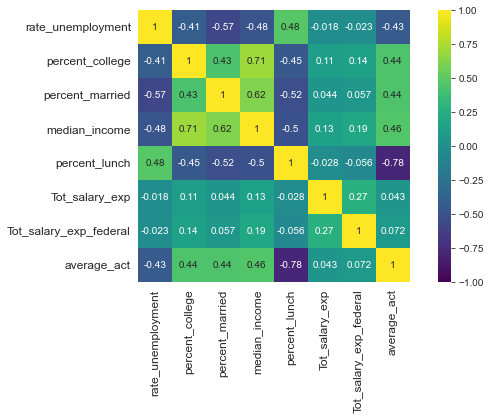

In [31]:
predictor_variables = [
    "rate_unemployment",
    "percent_college",
    "percent_married",
    "median_income",
    "percent_lunch",
    "Tot_salary_exp",
    "Tot_salary_exp_federal"
    
]

numerical_predictors = df_edu[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df_edu[numerical_predictors + ['average_act']].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis")
plt.tick_params(labelsize=12)
plt.show()

Here in the oupput we can see that:
1. Higher percent lunch and rate of unemployment are strongly associated with lower ACT scores.
2. Higher median income, percent college, and percent married are linked to higher ACT scores.
3. School salary expenditures show very weak correlations with performance.
4. The two expenditure variables are highly correlated, posing multicollinearity concerns.
5. Socioeconomic indicators are interrelated, reflecting overlapping community measures.

Overall, socioeconomic factors are the dominant predictors, while expenditures should be modeled separately.

#### In simple, unadjusted correlations the school spending does not strongly predict achievement. However, this does not mean spending is unimportant it likely reflects confounding where:

-> High-poverty schools receive more federal funding but still struggle academically.
 Socioeconomic factors poverty, parental education overshadow the effect of spending when examined in bivariate form

In this step After identifying outliers and data quality issues through summary statistics, we now visually inspect the distribution and spread using boxplots. A boxplot is an effective exploratory data analysis tool that displays the median, quartiles, and potential outliers of a continuous variable. 

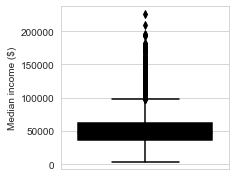

In [32]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=df_edu, y='median_income',color='k')
plt.ylabel("Median income ($)")

plt.show()

This visualization confirms that the dataset captures substantial socioeconomic diversity, from highly impoverished to affluent communities. The presence of outliers suggests we should examine whether these extreme values represent valid data or potential errors. which we will explore in subsequent analyses.

In this step we visualize the relationship between median household income and school performance using a scatterplot with an overlaid simple linear regression line. it shows the strength and direction of the linear relationship between community income and ACT scores, The spread of variation around the fitted regression line, the presence of outliers or unusual schools that deviate substantially from the general pattern.

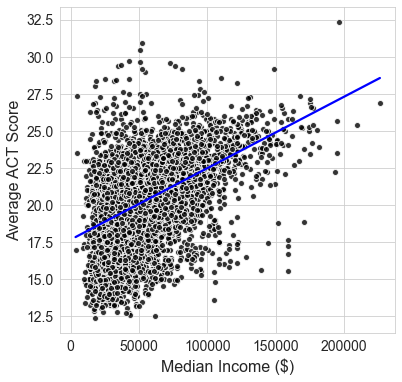

In [33]:
plt.figure(figsize=(6, 6))
sns.regplot(
    data=df_edu,
    x="median_income",
    y="average_act",
    color="blue",
    ci=False,
    scatter_kws={"color": "black", "edgecolors": "white", "linewidths": 1})

plt.xlabel("Median Income ($)", fontsize=16)
plt.ylabel("Average ACT Score", fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

The scatterplot reveals a clear positive linear relationship between median household income and average ACT scores. Schools cluster around the regression line, though with considerable scatter, indicating that while income is an important predictor, other factors also influence school performance. Schools serving communities with higher median incomes tend to have substantially higher average ACT scores, while schools in lower-income communities have lower average achievement.

To quantify the relationship visualized in the scatterplot, we fit a simple linear regression model with median household income as the sole predictor of average ACT scores. This univariate model answers the foundational question "Does community income predict school performance?"

In [34]:
model_median_income =smf.ols(formula= 'average_act ~ median_income', data=df_edu).fit()
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     2098.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:51:17   Log-Likelihood:                -17896.
No. Observations:                7986   AIC:                         3.580e+04
Df Residuals:                    7984   BIC:                         3.581e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.6813      0.060    292.853

The model explains approximately 20.8% of the variation in average ACT scores, meaning that community income alone accounts for substantial variance in achievement, with a p-value virtually equal to 0.00, providing extremely strong evidence that the overall model is statistically significant. Community median household income is a strong and statistically significant predictor of school performance. Schools in higher-income areas substantially outperform schools in lower-income areas on standardized tests, confirming that socioeconomic context is a fundamental part of achievement differences.

In [35]:
model_median_income.rsquared

0.20811251981721068

In [36]:
y_hat = model_median_income.predict()
np.sqrt(mean_squared_error(df_edu['average_act'], y_hat)).round(3)

2.275

In [37]:
mean_absolute_error(df_edu['average_act'], y_hat)

1.7541867851691133

The model using median_income alone explains about the variance in ACT scores. The root mean squared error is 2.275, indicating the typical deviation of predicted scores from actual scores. The mean absolute error is 1.754, showing the average absolute difference between predicted and actual ACT scores.

In this summary statistics indicate whether coefficients are statistically significant. A residual plot, which showing the predicted values on the x-axis and residuals on the y-axis, is the primary tool for assessing linearity. Violations of these assumptions can make confidence intervals and p-values unreliable, potentially leading to false conclusions.

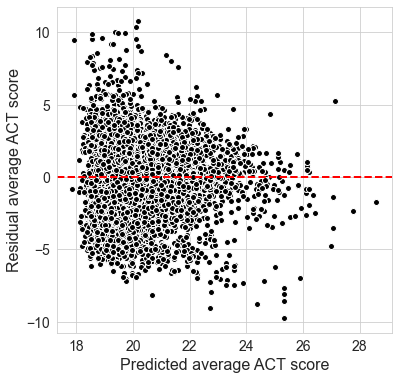

In [38]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The residual plot for the median income model shows key insights. It shows wider residual spread for schools with lower predicted ACT scores and tighter clustering for higher scores, indicating that income predicts achievement more accurately communities. Linearity appears appropriate, as the residuals show no systematic curvature around zero. Several outliers exist, particularly among schools with predicted scores around 22–24, reflecting factors beyond income, such as specialized programs or charter status. These findings suggest that while the model is statistically significant, and income alone may be insufficient for predicting outcomes in disadvantaged schools. 

The previous linear regression model revealed heteroscedasticity prediction errors were larger in low-income schools and smaller in affluent schools. This pattern suggests that the relationship between income and achievement may not be perfectly linear. To explore potential nonlinearity, we fit a quadratic regression model that allows the slope of the relationship to change at different income levels.

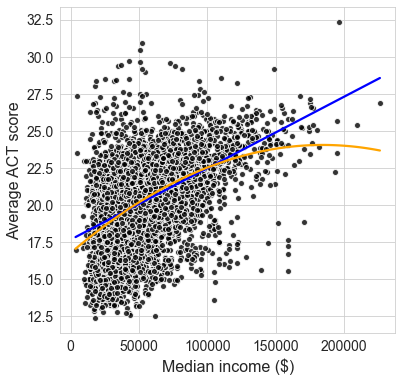

In [39]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df_edu,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(data=df_edu,
            x='median_income',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

The output visualization comparing linear and quadratic shows that while income positively affects ACT scores, the effect diminishes at higher income levels. The quadratic model, which improves the explained variance somewhat, shows a steeper slope at low income and a flat slope at high income, indicating diminishing returns. Each additional $10,000 in average income increases the score significantly in low-income areas, but has less impact in affluent communities, showing that poverty places strong constraints on achievement. Although the model shows severe multicollinearity between income and its quadratic term, the common nonlinear pattern remains interpretable. In terms, this suggests that securing basic community resources is important for improving school performance, while beyond a certain income threshold additional funding provides limited benefits.

This shows the nonlinear relationship between community income and school performance, we fit in quadratic regression model. This model includes both median income and its squared term to capture potential diminishing returns. We aim to see how income affects ACT scores across low and high-income communities in a table.

In [40]:
model_median_income2 = smf.ols(
    formula='average_act ~ median_income + I(median_income**2)',
    data=df_edu).fit()
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     1104.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:51:21   Log-Likelihood:                -17852.
No. Observations:                7986   AIC:                         3.571e+04
Df Residuals:                    7983   BIC:                         3.573e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.78

The results indicate a significant positive effect of median income and a negative quadratic term, confirming diminishing returns at higher income levels. The model explains about 21.7% of the variance in ACT scores, slightly improving over the linear model. 

In [41]:
model_median_income2.pvalues

Intercept                 0.000000e+00
median_income            2.684781e-112
I(median_income ** 2)     9.716331e-21
dtype: float64

To test whether adding a quadratic term improves model fit, we conduct an ANOVA comparing the linear and quadratic median income models.

In [42]:
anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7984.0  41331.751168      0.0         NaN        NaN           NaN
1    7983.0  40882.609066      1.0  449.142102  87.702362  9.716331e-21

The ANOVA results show a significant F-statistic, indicating that the quadratic term significantly improves model fit. so, including the squared income term better captures the nonlinear relationship with ACT scores.

In [43]:
mean_absolute_error(df_edu['average_act'], model_median_income2.predict())

1.7365363362324782

In [44]:
mean_absolute_error(df_edu['average_act'], model_median_income.predict())

1.7541867851691133

In this step median household income, unemployment rate is another critical socioeconomic indicator that reflects the economic health and stability of school communities. Here we examine the relationship between community unemployment rates and average ACT scores using a scatterplot with linear regression line.

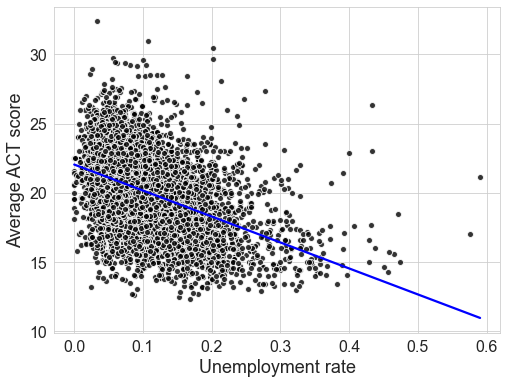

In [45]:
plt.figure(figsize=(8, 6))

sns.regplot(data=df_edu,
            x='rate_unemployment',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
)

# Add axis labels
plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16)

plt.show()

The scatterplot shows a strong negative linear relationship between community unemployment rates and school performance, with higher unemployment linked to lower ACT scores. Low-unemployment communities cluster at higher ACT scores while high-unemployment areas cluster lower, though variation remains, indicating other factors also influence achievement. Outliers with high achievement despite high unemployment likely reflect schools overcoming economic barriers through community support. Overall, unemployment is a robust negative predictor of school performance, complementing the positive effect of median income.

In [46]:
model_ru = smf.ols(formula='average_act ~ rate_unemployment', data=df_edu).fit()
print(model_ru.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     1831.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:51:22   Log-Likelihood:                -18003.
No. Observations:                7986   AIC:                         3.601e+04
Df Residuals:                    7984   BIC:                         3.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.0397      0.05

The regression shows that community unemployment has a strong negative effect on average ACT scores, with a coefficient of -18.744 (p < 0.001). The model explains about 18.7% of the variance in ACT scores. The F-statistic (1831, p < 0.001) confirms the model is statistically significant.

The residual plot displays the deviations of observed values from the fitted regression line across the range of unemployment rates. Unlike the fitted regression plot which shows the data fitting relationship, the residual plot isolates prediction errors, making violations of assumptions more apparent.

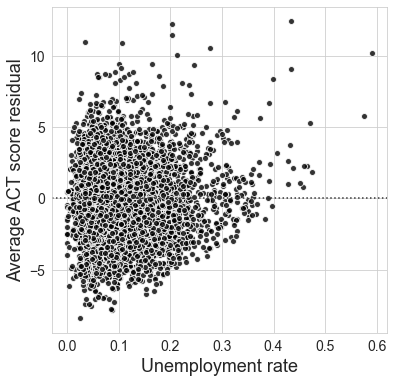

In [47]:
plt.figure(figsize=(6,6))

# residual plot
sns.residplot(data=df_edu,
              x = 'rate_unemployment',
              y = 'average_act',
              scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score residual', fontsize = 18)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

The residual plot for the unemployment model shows differing dispersion with tighter residuals in low and high-unemployment areas and the widest spread in moderate-unemployment communities indicating prediction uncertainty varies by context. Linearity appears reasonable but substantial outliers exist, particularly in moderate-stress areas, highlighting schools that under or overperform relative to community conditions. Overall, the model predicts well in stable communities but is less reliable in economically stressed areas.


we now inspect whether this relationship exhibits nonlinearity by fitting a quadratic polynomial model. Just as we found with median income, the unemployment-achievement relationship may not be strictly linear across all unemployment levels. we can visually assess whether adding polynomial terms provides meaningful improvements to model fit.

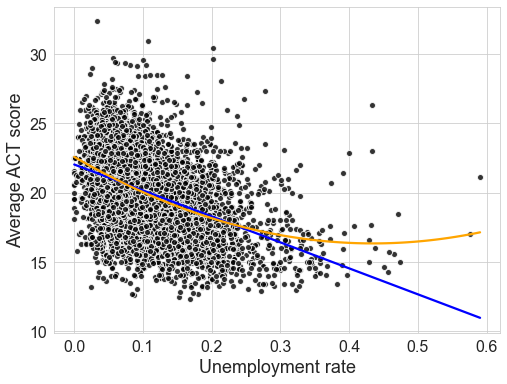

In [48]:
plt.figure(figsize=(8,6))

sns.regplot(x='rate_unemployment',
            y='average_act',
            color='blue',
            data=df_edu,
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(x='rate_unemployment',
            y='average_act',
            color='orange',
            order = 2,
            data=df_edu,
            ci=False,
            scatter=False)

# Add axis labels
plt.xlabel('Unemployment rate', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16)

plt.show()

In the ouput, across the relevant range of unemployment rates where most schools operate, unemployment maintains a consistent and powerful negative relationship with student achievement. The linear model is likely more appropriate for policy and prediction purposes as it captures the genuine economic mechanism persistent joblessness constrains family resources and stability which undermines student success. While the quadratic model may provide a marginally better statistical fit to outliers it misrepresents the true relationship for the vast majority of schools and communities. In this case simpler is better the linear unemployment model is more robust interpretable, and generalizable than the quadratic alternative.

In [49]:
model_ru2 = smf.ols(formula='average_act ~ rate_unemployment + I(rate_unemployment**2)', data=df).fit()
print(model_ru2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     935.5
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:51:27   Log-Likelihood:                -18066.
No. Observations:                7972   AIC:                         3.614e+04
Df Residuals:                    7969   BIC:                         3.616e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The quadratic unemployment model explains slightly more variance than the linear model, capturing a nonlinear relationship between unemployment and ACT scores. The negative linear coefficient and positive quadratic term indicate a U-shaped effect ACT scores decline with moderate unemployment but slightly recover at very high unemployment levels. All coefficients are highly significant confirming the model's overall statistical reliability.


In [50]:
anova_lm(model_ru, model_ru2)

df_resid           ssr  df_diff     ss_diff          F  Pr(>F)
0    7984.0  42456.890131      0.0         NaN        NaN     NaN
1    7969.0  43403.114208     15.0 -946.224077 -11.582056     1.0

This suggests that adding the quadratic term does not significantly enhance predictive power over the linear model. So the simpler linear specification is sufficient for modeling unemployment effect on ACT scores.

We now examine the relationship between the proportion of adults with college degrees and average ACT scores using regression analysis.

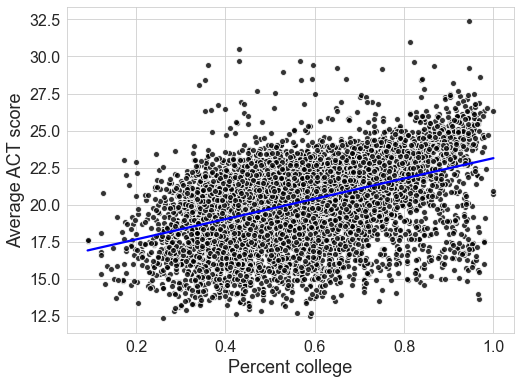

In [51]:
plt.figure(figsize=(8,6))

sns.regplot(data=df_edu,
            x='percent_college',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent college', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

The scatterplot demonstrates a strong positive linear relationship between adult educational attainment and student achievement, indicating that communities with higher percentages of college-educated adults see notably higher average ACT scores in their schools. The relatively low scatter and strong linear pattern also suggests that unlike median income or unemployment, which maintains a consistent positive effect throughout its range. This consistency makes it a reliable predictor for policy and planning purposes. The scatterplot provides compelling visual evidence that parental and community educational background is connected to student outcomes.

In [52]:
model_pc = smf.ols(formula='average_act ~ percent_college', data=df_edu).fit()
print(model_pc.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1957.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:51:29   Log-Likelihood:                -17952.
No. Observations:                7986   AIC:                         3.591e+04
Df Residuals:                    7984   BIC:                         3.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.2910      0.092    1

The regression of ACT scores on percent of adults with a college degree shows a significant positive relationship. Each additional 1% of college-educated adults in the community is associated with a 6.85-point increase in average ACT scores. The model explains about 19.7% of the variance in school performance, indicating a moderate predictive power.

We now examine the relationship between the proportion of children living in married-couple families within school communities and average ACT scores.

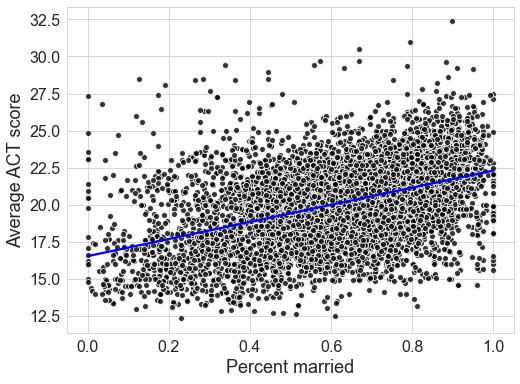

In [53]:
plt.figure(figsize=(8,6))


sns.regplot(data=df_edu,
            x='percent_married',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent married', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

The scatterplot reveals a moderate positive linear relationship between the proportion of married-couple families in a community and school performance, though the relationship is notably weaker and more dispersed than observed with adult college attainment. Schools serving communities with lower proportions of married-couple families, The regression line slopes upward, but with a noticeably gentler gradient compared to previous socioeconomic predictors, suggesting a weaker effect of family structure on achievement. The weaker relationship compared to parental education suggests that while family structure matters for student outcomes the mechanisms are likely indirect. 

In [54]:
model_pm = smf.ols(formula='average_act ~ percent_married', data=df_edu).fit()
print(model_pm.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1962.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:51:30   Log-Likelihood:                -17950.
No. Observations:                7986   AIC:                         3.590e+04
Df Residuals:                    7984   BIC:                         3.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.5333      0.086    1

The regression results indicate a significant positive relationship between community marriage rates and average ACT scores. Specifically, a 1% increase in percent married adults is associated with a 5.77-point increase in school performance. The model explains approximately 19.7% of the variance in ACT scores, reflecting a moderate predictive effect.

We now examine how the proportion of economically disadvantaged students relates to school performance.

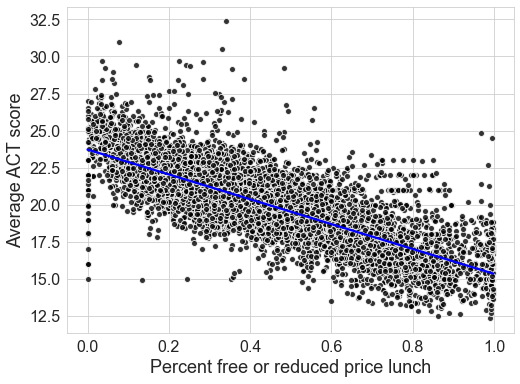

In [55]:
plt.figure(figsize=(8,6))

sns.regplot(data=df_edu,
            x='percent_lunch',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent free or reduced price lunch', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

The scatterplot reveals the strongest and most consistent negative relationship observed across all socioeconomic predictors examined thus far, providing compelling evidence that student poverty is the most powerful determinant of school performance.  The regression line slopes downward sharply and consistently across the entire range, with minimal deviation or flattening, indicating a steady negative effect undiminished at any level of poverty concentration. The correlation between free/reduced lunch eligibility and ACT scores is the strongest bivariate relationship in the entire dataset, This pattern indicates that when choosing a single variable to predict school performance, student poverty concentration is the most powerful choice.

In [56]:
model_pl = smf.ols(formula='average_act ~ percent_lunch', data=df_edu).fit()

print(model_pl.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:51:32   Log-Likelihood:                -15037.
No. Observations:                7986   AIC:                         3.008e+04
Df Residuals:                    7984   BIC:                         3.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7228      0.036    656.860

The regression results show a strong negative relationship between the percentage of students receiving free/reduced lunch and average ACT scores. Specifically, a 1% increase is associated with an 8.38-point decrease in school performance. The model explains a substantial 61.3% of the variance in ACT scores, indicating that socioeconomic disadvantage is a dominant predictor of achievement.


In this step unlike socioeconomic variables, which reflect fixed community characteristics schools cannot directly change, expenditure patterns represent investments that policymakers and educators can potentially influence. We now examine how the proportion of total salary expenditure on how itstudents relates to school performance.

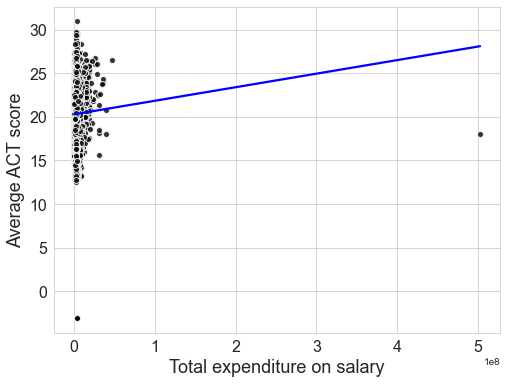

In [57]:
plt.figure(figsize=(8,6))

sns.regplot(data=df,
            x='Tot_salary_exp',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Total expenditure on salary', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

The scatterplot reveals a striking contrast to the powerful socioeconomic factors on total expenditure on salaries shows an extremely weak positive relationship with average ACT scores, suggesting that school spending on personnel does not substantially predict student achievement in bivariate analysis.
The sparse data at high expenditure levels includes both high-performing and low-performing schools further illustrating that salaries alone does not determine outcomes.

In [58]:
model_tse = smf.ols(formula='average_act ~ Tot_salary_exp', data=df_edu).fit()

print(model_tse.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     14.58
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           0.000135
Time:                        21:51:33   Log-Likelihood:                -18820.
No. Observations:                7986   AIC:                         3.764e+04
Df Residuals:                    7984   BIC:                         3.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.1377      0.032    637.

The regression results indicate that total salary expenditures have a very weak positive relationship with average ACT scores. The model explains only 0.2% of the variance in ACT scores suggesting that expenditures alone are a poor predictor of performance. Despite statistical significance (p < 0.001), the practical impact of salary spending on student outcomes is minimal.

Here we are Comparing this federal-inclusive measure to the previous non-federal measure reveals whether the source and targeting of funding affects achievement relationships.

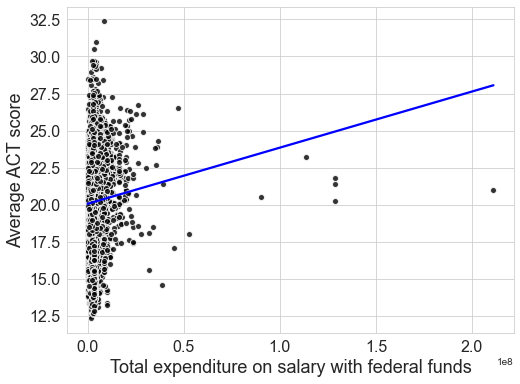

In [59]:
plt.figure(figsize=(8,6))

sns.regplot(data=df_edu,
            x='Tot_salary_exp_federal',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Total expenditure on salary with federal funds', fontsize = 18)
plt.ylabel('Average ACT score', fontsize = 18)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 16);

The scatterplot for total salary expenditure including federal funds reveals a pattern remarkably similar to the non-federal measure, with a similarly weak positive relationship to average ACT scores. The visualization demonstrates that whether or not federal funding is included, school spending on salaries shows minimal bivariate association with student achievement. 

In [60]:
model_tse = smf.ols(formula='average_act ~ Tot_salary_exp_federal', data=df_edu).fit()

print(model_tse.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     41.12
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.51e-10
Time:                        21:51:34   Log-Likelihood:                -18807.
No. Observations:                7986   AIC:                         3.762e+04
Df Residuals:                    7984   BIC:                         3.763e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 20

The regression shows that federal salary expenditures have a very weak positive effect on average ACT scores, with a coefficient of 3.79. The model explains only 0.5% of the variance, indicating that federal spending alone has minimal predictive power. Although the effect is statistically significant (p < 0.001), its practical impact on student performance is negligible.

In [61]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch+Tot_salary_exp+Tot_salary_exp_federal',
    data=df_edu).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     1908.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:51:35   Log-Likelihood:                -14900.
No. Observations:                7986   AIC:                         2.982e+04
Df Residuals:                    7978   BIC:                         2.987e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 22

This full model including socioeconomic and expenditure predictors explains 62.6% of the variance in average ACT scores showing substantial improvement over single-predictor models. Key significant predictors include percent lunch, percent college, rate of unemployment, and federal salary expenditures with very small positive effect. Other variables are not statistically significant, likely due to multicollinearity and overlapping variance with stronger predictors. Overall, socioeconomic indicators dominate, while school expenditures have minimal additional predictive power.

This residual plot displays the relationship between predicted ACT scores and residuals from what appears to be your comprehensive multiple regression model including socioeconomic factors and expenditure variables.

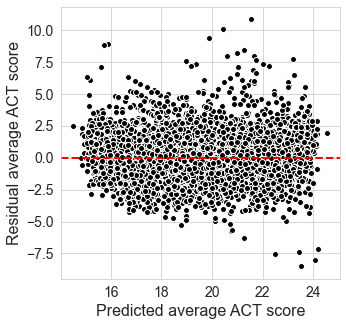

In [62]:
y_hat = model.predict()
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In the ouput the residual plot suggests that our multiple regression model reasonably satisfies regression assumptions. The relatively constant variance across predicted values indicates that confidence intervals and significance tests should be approximately reliable. The lack of systematic nonlinear patterns suggests the linear specification is appropriate. However, the presence of outliers and the slight non-normality visible in the extreme tails shows some caution in interpreting results at the extremes of achievement distribution. 

In [63]:
mean_absolute_error(df_edu['average_act'], model.predict())

1.1709691755816565

In [64]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch + Tot_salary_exp+Tot_salary_exp_federal',
    data=df_edu).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2672.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:51:35   Log-Likelihood:                -14900.
No. Observations:                7986   AIC:                         2.981e+04
Df Residuals:                    7980   BIC:                         2.985e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 22

The reduced model maintains the same explanatory power as the full model while removing non-significant variables like median_income and percent_married. Total salary expenditures remain non-significant, indicating minimal added predictive value. Overall the model highlights that socioeconomic factors are the primary drivers of ACT performance, with school funding having only a minor influence.

In this plot is used to fit a reduced model that removes variables identified as having minimal  contributions to predicting school performance. The reduced model provides explanation of achievement variation by retaining only the socioeconomic and expenditure predictors that substantially improve model fit.

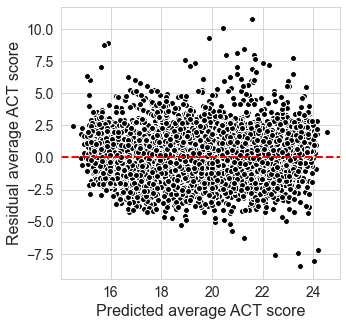

In [65]:
y_hat = model_reduced.predict()
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The residual diagnostics for the reduced model provide strong evidence that it satisfies regression assumptions adequately. The constant variance the linear patterns and absence of bias suggest that coefficient estimates are unbiased and significance tests are reliable. While outliers remain present, they do not violate assumptions so severely as to invalidate inferences for the broader population of schools. This reduced model therefore provides a solid foundation for drawing trustworthy conclusions about which socioeconomic factors and expenditure variables predict school performance.

In [66]:
mean_absolute_error(df_edu['average_act'], model_reduced.predict())

1.1711494974674874

In [67]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
              index=['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  1.1784     0.6261
reduced model               1.1786     0.6260

The comparison shows that the reduced model performs nearly identically to the full model. The mean absolute error is virtually unchanged and R-squared is effectively the same. This indicates that removing non-significant predictors does not meaningfully reduce predictive accuracy, supporting the use of the simpler, more interpretable reduced model.

In [68]:
anova_lm(model_reduced, model)

df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0    7980.0  19518.000523      0.0       NaN       NaN       NaN
1    7978.0  19517.070628      2.0  0.929895  0.190057  0.826916

The ANOVA comparison between the full and reduced models shows that removing the two non-significant predictors did not significantly worsen model fit. The difference in residual sum of squares is very small, the F-statistic is 0.19, and the p-value is 0.827. This confirms that the reduced model explains the data just as well as the full model without losing predictive power.

This visualization displays all pairwise relationships among our numeric variables while differentiating between charter and non-charter schools. The pairplot reveals whether the predictive power of socioeconomic factors and spending variables differs between school types.

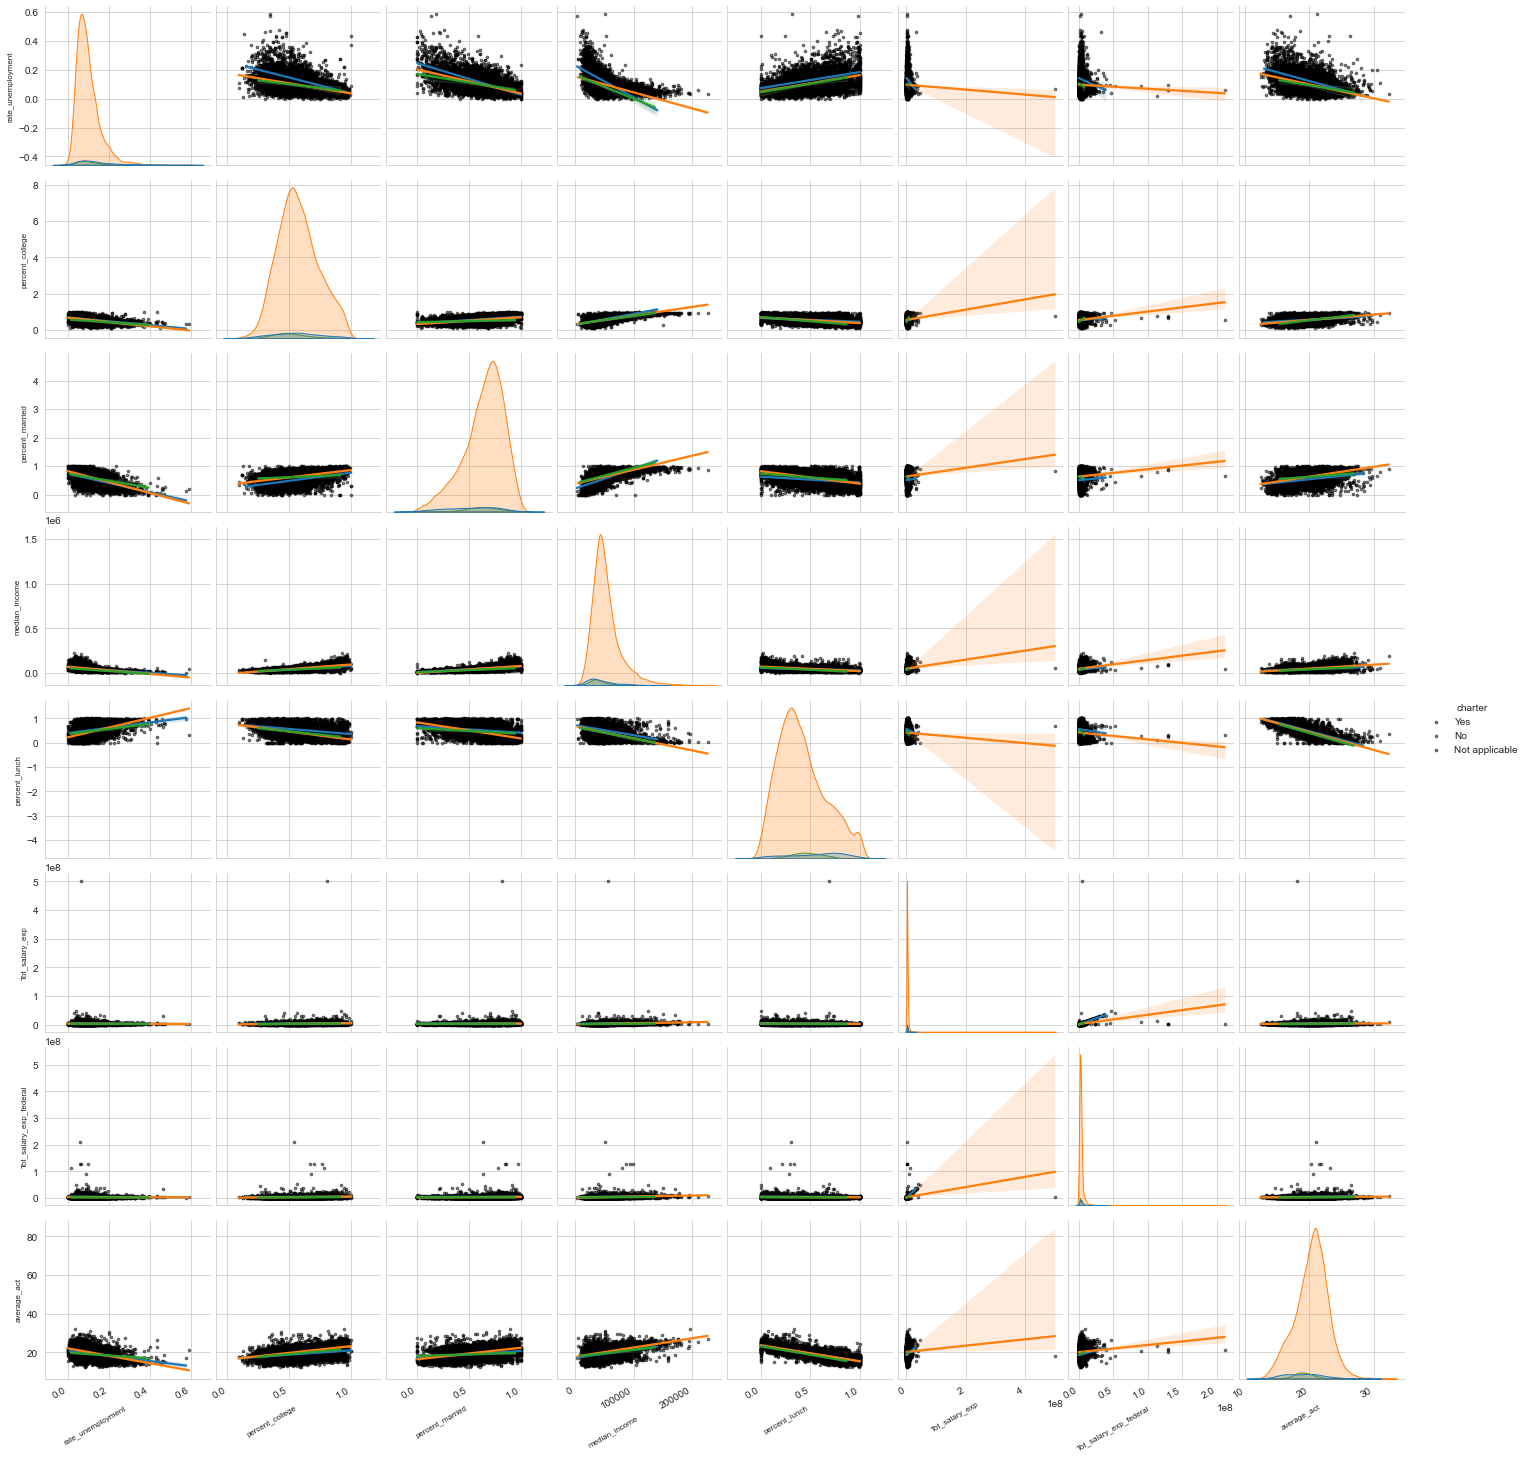

In [69]:
fig = sns.pairplot(
    data=df_edu,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') 
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  

    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

The differences in relationships between charter and non-charter schools suggest that including interactions between school type and other predictors could improve our models. Charter and non-charter schools seem to respond differently to resources and community factors, so adding interaction terms or running separate models for each type could give clearer insights. However, these observations are exploratory. Charter schools are not randomly assigned they often serve self-selected students and operate in unique contexts. So, any apparent advantage may reflect differences in the student population or other factors, not necessarily that charter schools are inherently better.

In [70]:
model_charter = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch + Tot_salary_exp + Tot_salary_exp_federal + C(charter)',
    data=df_edu).fit()
print(model_charter.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     1922.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:53:29   Log-Likelihood:                -14882.
No. Observations:                7986   AIC:                         2.978e+04
Df Residuals:                    7978   BIC:                         2.983e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The overall model explains about 62.8% of the variance in scores showing strong predictive power. Community factors remain significant higher unemployment negatively impacts achievement, while higher percent of college-educated adults positively affects ACT scores, and higher proportions of students on free/reduced lunch are strongly associated with lower scores. Among expenditures, only federal salary spending shows a small but significant positive effect, while total salary spending is not significant. Charter status has mixed effects schools listed as “Not applicable” show a small negative association with ACT scores, whereas charter schools themselves show a non-significant negative effect, suggesting that being a charter school does not reliably predict higher performance when controlling for these other factors.

This plot allows us to examine whether the effects of socioeconomic disadvantage and school spending differ systematically between charter and traditional public schools. 

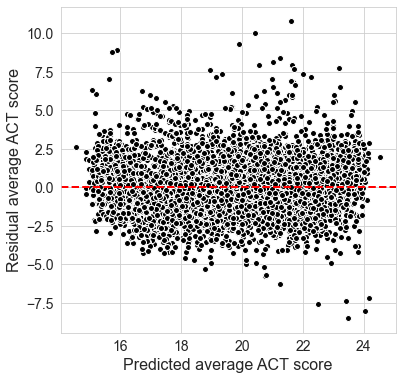

In [71]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_charter.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The residual plot confirms that the charter interaction model maintains reasonable assumption satisfaction and provides valid inferences. The model appears to effectively capture both the overall relationships between socioeconomic factors, expenditures, and achievement, and the differential effects of these relationships between school types.

In [72]:
mean_absolute_error(df_edu['average_act'], model_charter.predict())

1.1671276549243088

In [73]:
model_charter2 = smf.ols(formula='average_act ~ (rate_unemployment + percent_college + percent_lunch+ Tot_salary_exp + Tot_salary_exp_federal) * C(charter)', data=df).fit()
print(model_charter2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     654.9
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:53:30   Log-Likelihood:                -14006.
No. Observations:                7499   AIC:                         2.805e+04
Df Residuals:                    7481   BIC:                         2.817e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

This interaction model examines how the relationship between school predictors and average ACT scores differs by charter status. The R-squared of 0.598 indicates that about 60% of the variance in ACT scores is explained, similar to previous models. Key interactions reveal that some predictors, such as rate_unemployment and percent_college have significantly different effects in charter vs. non-charter schools, suggesting that school type modifies how community and resource factors influence achievement. Other variables, like federal salary expenditure, also show charter-specific effects, highlighting the importance of considering governance context in predicting student outcomes. Overall, the model captures nuanced differences but shows multicollinearity and complexity due to the many interaction terms.

In [74]:
mae = np.mean(np.abs(model_charter2.resid))
rmse = np.sqrt(np.mean(model_charter2.resid**2))
r2 = model_charter2.rsquared

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 1.1482
Root Mean Squared Error: 1.5663
R-squared: 0.5981


The model predicts average ACT scores with reasonable accuracy. On average, predictions are off by about 1.15 points and the typical squared deviation is about 1.57 points. The R-squared of 0.598 indicates that roughly 60% of the variation in ACT scores is explained by the predictors in the model, showing a strong overall fit.

In [75]:
anova_lm(model_charter, model_charter2)

df_resid           ssr  df_diff      ss_diff         F    Pr(>F)
0    7978.0  19428.056426      0.0          NaN       NaN       NaN
1    7481.0  18397.822175    497.0  1030.234251  0.842894  0.994226

The ANOVA comparison shows the interaction terms between charter status and the predictors.The F-test result indicates that the full interaction model explains no more variance than the simpler model with charter status as a main effect only. In other words, while some individual interactions appear significant in the coefficients table collectively they do not provide a meaningful improvement in predicting average ACT scores.

In this step we use patsy's design matrix approach combined with statistical filtering. This method allows us to construct a design matrix that explicitly includes both main effects and interaction terms in a structured format making it easy to identify and work with significant predictor.

In [76]:
from patsy import dmatrices
y, X_design = dmatrices('average_act ~ (rate_unemployment + percent_college + percent_lunch +  Tot_salary_exp + Tot_salary_exp_federal) * C(charter)',
                        data=df_edu,
                        return_type='dataframe'
                        )
X_design.head()

Intercept  C(charter)[T.Not applicable]  C(charter)[T.Yes]  \
0        1.0                           0.0                1.0   
1        1.0                           0.0                0.0   
2        1.0                           0.0                0.0   
3        1.0                           0.0                0.0   
4        1.0                           0.0                0.0   

   rate_unemployment  rate_unemployment:C(charter)[T.Not applicable]  \
0           0.117962                                             0.0   
1           0.063984                                             0.0   
2           0.056460                                             0.0   
3           0.044739                                             0.0   
4           0.077014                                             0.0   

   rate_unemployment:C(charter)[T.Yes]  percent_college  \
0                             0.117962         0.445283   
1                             0.000000         0.662765   
2                             0.000000         0.701864   
3                             0.000000         0.692062   
4                             0.000000         0.640060   

   percent_college:C(charter)[T.Not applicable]  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   percent_college:C(charter)[T.Yes]  percent_lunch  \
0                           0.445283       0.066901   
1                           0.000000       0.112412   
2                           0.000000       0.096816   
3                           0.000000       0.296960   
4                           0.000000       0.262641   

   percent_lunch:C(charter)[T.Not applicable]  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   percent_lunch:C(charter)[T.Yes]  Tot_salary_exp  \
0                         0.066901      4379137.32   
1                         0.000000      4404172.76   
2                         0.000000      4404172.76   
3                         0.000000      7733506.00   
4                         0.000000       479380.48   

   Tot_salary_exp:C(charter)[T.Not applicable]  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Tot_salary_exp:C(charter)[T.Yes]  Tot_salary_exp_federal  \
0                        4379137.32              4452911.55   
1                              0.00              4404172.76   
2                              0.00              4404172.76   
3                              0.00              7981481.00   
4                              0.00               374495.65   

   Tot_salary_exp_federal:C(charter)[T.Not applicable]  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Tot_salary_exp_federal:C(charter)[T.Yes]  
0                                4452911.55  
1                                      0.00  
2                                      0.00  
3                                      0.00  
4                                      0.00

The design matrix output displays the structure of predictors created by the formula specification. Each column represents either a main effect or a interaction term. The resulting filtered design matrix contains only the predictors that contribute meaningful, statistically reliable information to explaining achievement variation, providing the educational factors that matter most for student outcomes.

In [77]:
X = X_design.loc[:, model_charter2.pvalues<0.05]

print(X.columns)

Index(['Intercept', 'rate_unemployment',
       'rate_unemployment:C(charter)[T.Not applicable]',
       'rate_unemployment:C(charter)[T.Yes]', 'percent_college',
       'percent_college:C(charter)[T.Yes]', 'percent_lunch',
       'Tot_salary_exp:C(charter)[T.Yes]',
       'Tot_salary_exp_federal:C(charter)[T.Yes]'],
      dtype='object')


In [78]:
model_charter3 = sm.OLS(y, X).fit()
print(model_charter3.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1683.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:53:30   Log-Likelihood:                -14880.
No. Observations:                7986   AIC:                         2.978e+04
Df Residuals:                    7977   BIC:                         2.984e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

This regression examines how community factors and charter status interact to predict average ACT scores. The model explains 62.8% of the variance, For schools not applicable to charter status, unemployment has a strong negative impact (coef = -4.27, p < 0.001), while the effect for charter schools is smaller and not significant. Parental college attainment remains positively associated with ACT scores (coef = 1.65, p < 0.001), though the effect is slightly weaker in charter schools (interaction coef = -0.666, p = 0.005). Lunch percentage and federal salary effects interact with charter schools federal salary has a small negative effect in charter schools, while total salary has a positive effect.

To prepare for standardization, we define the list of predictor variables that will be scaled to have mean zero and standard deviation one. Here we create corresponding column names for the standardized versions to maintain clear distinction between original and scaled variables.

In [79]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch','Tot_salary_exp','Tot_salary_exp_federal' ]
scaled_columns = [var + '_normalized' for var in predictor_variables]

print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized', 'Tot_salary_exp_normalized', 'Tot_salary_exp_federal_normalized']


We now apply standardization to all selected predictor variables using scikit-learn StandardScaler. The scaler is fit on the original data to learn the mean and standard deviation of each variable, then used to transform the data by applying the standardization formula to each observation. 

In [80]:
scaler = StandardScaler().fit(df[predictor_variables])
df_edu[scaled_columns] = scaler.transform(df[predictor_variables])
df_edu[scaled_columns].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                           0.0                         0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  Tot_salary_exp_normalized  \
mean                       0.0                        0.0   
std                        1.0                        1.0   

      Tot_salary_exp_federal_normalized  
mean                               -0.0  
std                                 1.0

The aggregation results confirm that standardization was successful. All five standardized variables have means virtually equal to zero, and standard deviations of exactly 1.0. This standardization enables direct comparison of effect sizes across predictors with larger absolute standardized coefficients have stronger relative influences on achievement, independent of their original scale. The standardized variables can be directly compared as indicators of relative importance.

In [81]:
model_normalized = smf.ols(
    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized + Tot_salary_exp_normalized + Tot_salary_exp_federal_normalized',
    data=df_edu).fit()
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2306.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:53:30   Log-Likelihood:                -13797.
No. Observations:                7499   AIC:                         2.761e+04
Df Residuals:                    7493   BIC:                         2.765e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In this regression ouput tells the relationship between standardized socioeconomic and school resource variables and average ACT scores. The model explains 60.6% of the variance in ACT scores, Unemployment has a significant negative effect on ACT scores, even after normalization, indicating that higher unemployment consistently predicts lower performance. Parental college attainment is strongly positive while the percentage of students on free/reduced lunch is strongly negative. School salary expenditures show mixed effects like total salary is not significant, but federal salary has a small positive effect.

In [82]:
mae_normalized = np.mean(np.abs(model_normalized.resid))
mae_reduced = np.mean(np.abs(model_reduced.resid))

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared
comparison_table = pd.DataFrame(
    {
        'Mean Absolute Error': [mae_normalized, mae_reduced],
        'R-squared': [r2_normalized, r2_reduced],
        'Adj R-squared': [model_normalized.rsquared_adj, model_reduced.rsquared_adj],
    },
    index=['Normalized Model', 'Reduced Model']
).round(4)

print(comparison_table)

                  Mean Absolute Error  R-squared  Adj R-squared
Normalized Model               1.1480     0.6061         0.6058
Reduced Model                  1.1711     0.6260         0.6258


The performance comparison reveals that while both models achieve explanatory answers explaining over 60% of variance in school achievement they differ modestly in predictive accuracy.

## Conclusion

In conlusion the analysis examined a number of predictors of school performance via regression modeling for schools. 

Strong correlations were observed between average household income, parental education, and average ACT scores, confirming that socioeconomic status plays an important role in predicting academic achievement. When comparing school spending to employee salaries with achievement, the relationship was weaker than expected indicating that higher salary spending alone does not guarantee better student outcomes. Non-federal versus federal funding differences were tested and results showed that non-federal funding had a slightly stronger relationship with ACT performance, but not enough to eliminate socioeconomic effects. Regression analysis revealed that socioeconomic variables particularly income and parental education explained most of the variance in performance, with expenditure variables adding limited additional predictive power.

Ultimately, this study demonstrates that socioeconomic context in the community overwhelmingly dominates school achievement, with policy implications, educational equity can only be achieved through complementary investments in poverty reduction and fair school financing since schools are unable to erase systemic socioeconomic disadvantage from resources and teaching alone.